<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Twitter Data</h1>

<hr>


### ☑️ Objectives
At the end of this session, you will be able to:
- [ ] Understand how to find and run pre-trained models
- [ ] Evaluate results from pre-trained models
- [ ] Run a pre-trained model using real twitter data


### 🔨 Pre-Assignment

Create a new Conda environment for sentiment anaylsis (sa)

```bash
  conda create -n sa python=3.8 jupyter -y
```

Activate your new environment
```bash
  conda activate sa
```

Open the jupyter-notebook
```bash
  jupyter-notebook
```

Navigate through the repo in the notebook to find `imports.ipynb` for this week and open it.

Run all of the cells in the notebook.


### Background
Please review the weekly narrative [here](https://www.notion.so/Week-2-Data-Centric-AI-the-AI-Product-Lifecycle-72a84c1517b44fcbb3e6bd11d47477dc#2b73937612bb46559f5b91dc2bf55e7d)




<hr>

## 🚀 Let's Get Started

Let's first start with our imports

In [1]:
import csv # Allows us to read and write csv files
from pprint import pprint # Make our print functions easier to read

from transformers import pipeline # Hugging face pipeline to load online models

🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:
- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.

- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

This is the pipeline method in transformers that we'll be using to analyze our sentiment data. Since we're not specifying a pretrained model, the pipeline has a default sentiment analysis model called [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).

In [2]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In this example, we'll supply two polar sentiments and test out the model pipeline.

In [3]:
data = ["This is great!", "Oh no!"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.994263231754303}]

The `label` in this case indicates the prediction for the sentiment type.

The `score` indicates the confidence of the prediction (between 0 and 1).

Since our sentiments were very polar, it was easier for the model to predict the sentiment type.

Let's see what happens when we use a less clear example:

In [4]:
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?"]
sentiment_pipeline(challenging_sentiments)

[{'label': 'NEGATIVE', 'score': 0.9955561757087708},
 {'label': 'NEGATIVE', 'score': 0.9860844016075134}]

<hr>

### Loading the Twitter Data

Let's play with some twitter data. We'll be using a modified version of the [Elon Musk twitter dataset on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets).

In [5]:
with open('../data/elonmusk_tweets.csv', newline='', encoding='utf8') as f:
    tweets=[]
    reader = csv.reader(f)
    twitter_data = list(reader)
    for tweet in twitter_data:
        tweets.append(tweet[0])

pprint(tweets[:100])

['@vincent13031925 For now. Costs are decreasing rapidly.',
 'Love this beautiful shot',
 '@agnostoxxx @CathieDWood @ARKInvest Trust the shrub',
 'The art In Cyberpunk is incredible',
 '@itsALLrisky 🤣🤣',
 '@seinfeldguru @WholeMarsBlog Nope haha',
 '@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will '
 'soon guess based on time of day, taking you home or to work or to what’s on '
 'your calendar',
 '@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many '
 'missions',
 'Blimps rock  https://t.co/e8cu5FkNOI',
 '@engineers_feed Due to lower gravity, you can travel from surface of Mars to '
 'surface of Earth fairly easily with a single stage rocket. Earth to Mars is '
 'vastly harder.',
 '@DrPhiltill Good thread',
 '@alexellisuk Pretty much',
 '@tesla_adri @WholeMarsBlog These things are best thought of as '
 'probabilities. There are 5 forward-facing cameras. It is highly likely that '
 'at least one of them will see multiple cars ahead.',
 '@WholeMa

In [6]:
# Try with Pandas. The data is a little messy to look at."
import pandas as pd

In [7]:
df = pd.read_csv ('../data/elonmusk_tweets.csv')
df.head(10)

,@vincent13031925 For now. Costs are decreasing rapidly.
0,Love this beautiful shot
1,@agnostoxxx @CathieDWood @ARKInvest Trust the ...
2,The art In Cyberpunk is incredible
3,@itsALLrisky 🤣🤣
4,@seinfeldguru @WholeMarsBlog Nope haha
5,@WholeMarsBlog If you don’t say anything &amp;...
6,@DeltavPhotos @PortCanaveral That rocket is a ...
7,Blimps rock https://t.co/e8cu5FkNOI
8,"@engineers_feed Due to lower gravity, you can ..."
9,@DrPhiltill Good thread


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12561 entries, 0 to 12560
Data columns (total 1 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   @vincent13031925 For now. Costs are decreasing rapidly.  12561 non-null  object
dtypes: object(1)
memory usage: 98.3+ KB


First things first - let's look at the sentiment as determined by the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) (default model) in the pipeline.

In [9]:
distil_sentiment = sentiment_pipeline(tweets[0:100])

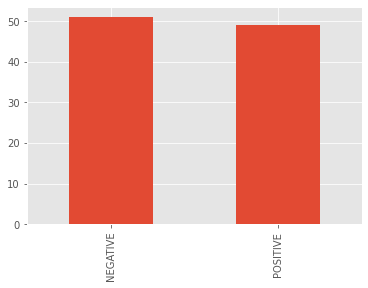

In [31]:
distil_sentiment_df['label'].value_counts().plot(kind='bar');

Let's check out the distribution of positive/negative Tweets and see the breakdown using Python's 🐍 standard library `collections.Counter`!

In [10]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in distil_sentiment])
pos_sent_count = tweet_distro['POSITIVE']
neg_sent_count = tweet_distro['NEGATIVE']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

49 (49.00%) of the tweets classified are positive.
51 (51.00%) of the tweets classified are negative.


In [11]:
#Lets put distil_sentiment into a dataframe to see scores for each tweet
distil_sentiment_df =pd.DataFrame(distil_sentiment)
distil_sentiment_df.head(10)

,label,score
0,NEGATIVE,0.996366
1,POSITIVE,0.999882
2,NEGATIVE,0.849831
3,POSITIVE,0.999886
4,NEGATIVE,0.983950
5,NEGATIVE,0.993329
6,NEGATIVE,0.991768
7,POSITIVE,0.998318
8,NEGATIVE,0.993785
9,NEGATIVE,0.984098


Let's do that process again, but use a model with an additional potential label "NEUTRAL" called [bertweet-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

To start - we'll build a pipeline with the new model by using the 🤗 Hugging Face address: `finiteautomata/bertweet-base-sentiment-analysis`

In [ ]:
bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Next, and the same as before, let's run the analysis on 100 of Elon's tweets.

In [ ]:
bert_sentiment = bertweet_pipeline(tweets[0:100])

And then, let's check out the breakdown of positive, negative, AND neutral sentiments!

In [ ]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in bert_sentiment])
pos_sent_count = tweet_distro['POS']
neu_sent_count = tweet_distro['NEU']
neg_sent_count = tweet_distro['NEG']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neu_sent_count} ({neu_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are neutral.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

❓ What do you notice about the difference in the results? 

❓ Do the results for the `bertweet-base` model look better, or worse, than the results for the `distilbert-base` model? Why?

<hr>

### Partner Exercise

With your partner, try and determine what the following tweets might be classified as. Try to classify them into the same groups as both of the model pipelines we saw today - and try adding a few of your own sentences/Tweets! 

In [ ]:
example_difficult_tweets = [
    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
    "<ADD YOUR OWN OPTION HERE>",
    "<ADD YOUR OWN OPTION HERE>",
]

The `distilbert-base` model:

In [ ]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(sentiment_pipeline(tweet))
    print(tweet + '\n')

The `bertweet-base` model:

In [ ]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(bertweet_pipeline(tweet))
    print(tweet + '\n')

❓ How did you do? Did you find any surprising results? 

❓ Are there any instances where the two models gave different predictions for the same tweet?